In [55]:
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library("factoextra")
library(readxl)
library(dplyr)
library(psych)
#install.packages("GPArotation")
library(GPArotation)
#install.packages("psy")
library(psy)
#install.packages("nFactors")
library(nFactors)
library(mvtnorm) # col.norm
library(tilting) # col.norm
library(corrplot)
library(writexl)
#install.packages("scales")
library(scales)
#install.packages("Rcsdp")
library(Rcsdp)
#install.packages('reshape2')
library(reshape2)
library(ggplot2)

In [7]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
df.wa.nocountry <- df.wa[,c(2:18)]
head(df.wa)

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5


# Factor Analysis

sources: http://www.di.fc.ul.pt/~jpn/r/factoranalysis/factoranalysis.html

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.1306056 1.3634837 1.29778602 1.19416869 1.09637759
Proportion of Variance 0.2670282 0.1093581 0.09907344 0.08388464 0.07070846
Cumulative Proportion  0.2670282 0.3763863 0.47545978 0.55934442 0.63005288
                           Comp.6     Comp.7     Comp.8    Comp.9    Comp.10
Standard deviation     0.99851459 0.99230650 0.95128241 0.9075667 0.80357634
Proportion of Variance 0.05864891 0.05792189 0.05323166 0.0484516 0.03798441
Cumulative Proportion  0.68870179 0.74662368 0.79985534 0.8483069 0.88629135
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.68852496 0.64449468 0.59008870 0.52902160 0.47384234
Proportion of Variance 0.02788627 0.02443373 0.02048263 0.01646258 0.01320745
Cumulative Proportion  0.91417762 0.93861135 0.95909398 0.97555656 0.98876400
                           Comp.16     Comp.17
Sta


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
phom  0.321  0.105  0.150  0.112  0.414                0.287  0.259  0.217 
pipy         0.425  0.299        -0.441 -0.129  0.142  0.177 -0.302        
ptap -0.265  0.382  0.234        -0.138         0.226 -0.238               
bore -0.136 -0.418  0.155 -0.367        -0.299 -0.333 -0.208  0.164 -0.317 
pwel -0.178 -0.337  0.118  0.324  0.107  0.148  0.397  0.296        -0.357 
pspr -0.166  0.326 -0.425         0.271 -0.116  0.200 -0.107        -0.317 
rain  0.120        -0.320        -0.364  0.676 -0.162 -0.151 -0.138 -0.161 
uwel -0.279 -0.277  0.247  0.169         0.193  0.115 -0.131         0.508 
uspr -0.255  0.198 -0.446                              0.229  0.141  0.134 
truc                       0.531  0.249 -0.104 -0.369 -0.312 -0.496 -0.152 
ctan        -0.191 -0.235  0.431 -0.400 -0.434  0.244                      
bott  0.271 -0.176 -0.381        -0.114 -0.113  0.274 -0.278         0.301 
o

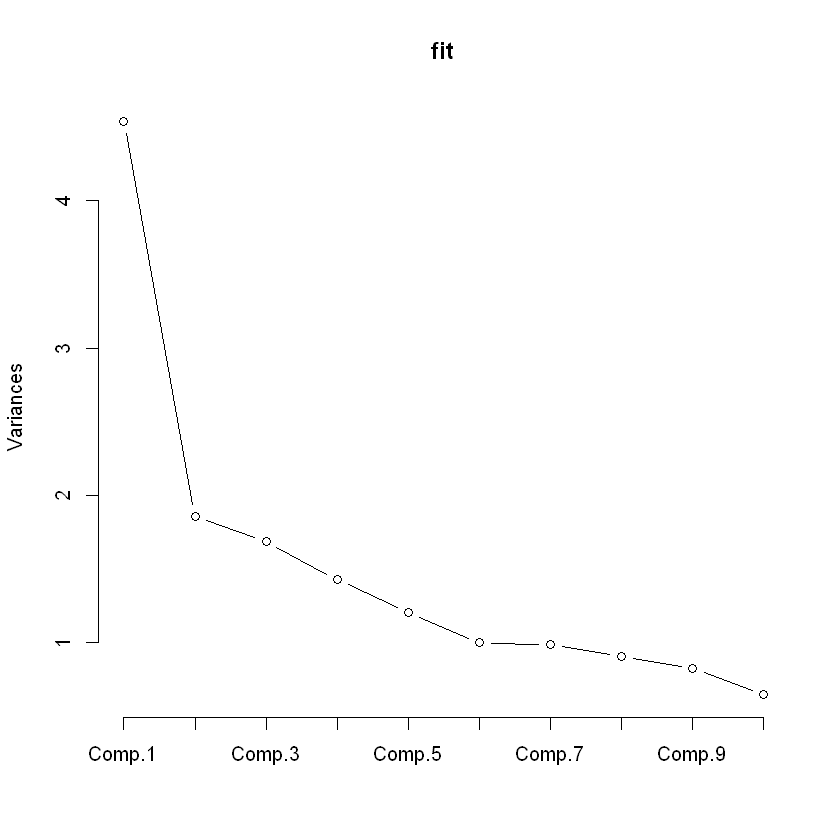

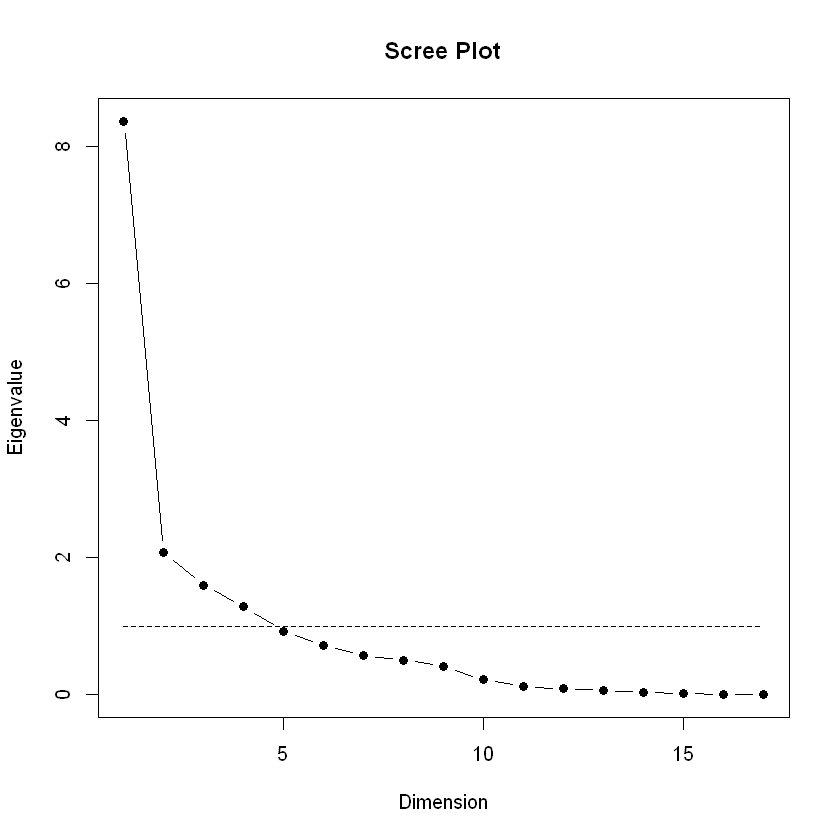

In [5]:
# Pricipal Components Analysis
# entering raw data and extracting PCs
# from the correlation matrix
fit <- princomp(df.wa[,c(2:18)], cor=TRUE)
summary(fit) # print variance accounted for
loadings(fit) # pc loadings
plot(fit,type="lines") # scree plot

n.factors = 7
fit <- factanal(df.wa[,c(2:18)], 
                n.factors ,                # number of factors to extract
                scores=c("Bartlett"),
                rotation="promax")
scree.plot(fit$correlation)

In [20]:
solution <- fa(df.wa.nocountry, nfactors = 7, rotate = "promax", fm = "ml", scores="tenBerge", impute ="mean", max.iter = 1000 )
scores.seven.factors = solution$scores
scores.seven.factors = as.data.frame.matrix(scores.seven.factors) #df.wa multiply by scores matrix
write_xlsx(scores.seven.factors, '../../results/scores-7-factors.xlsx')
print(solution$loadings, digits=2, cutoff=.2, sort=TRUE) #sort out by the low numbers


Loadings:
     ML1   ML6   ML3   ML5   ML2   ML7   ML4  
pwel  0.72                                    
uwel  0.92 -0.36                              
watp -0.62 -0.24              0.21            
pspr -0.25  0.90                              
uspr        0.72                    0.43      
phom              0.52 -0.49 -0.27            
bore       -0.43 -1.04       -0.34        0.24
pipy -0.36 -0.23        0.87                  
ptap  0.26        0.22  0.52              0.28
bott                   -0.22  0.86 -0.32      
surw                                0.70      
tles  0.21                          0.37  0.61
rain                          0.22       -0.45
truc                                     -0.30
ctan                          0.42            
othw              0.28                        
tmor  0.50  0.39                              

                ML1  ML6  ML3  ML5  ML2  ML7  ML4
SS loadings    2.42 2.01 1.61 1.42 1.26 1.00 0.91
Proportion Var 0.14 0.12 0.09 0.08 0.07 0.

# A bar graph of factor loadings

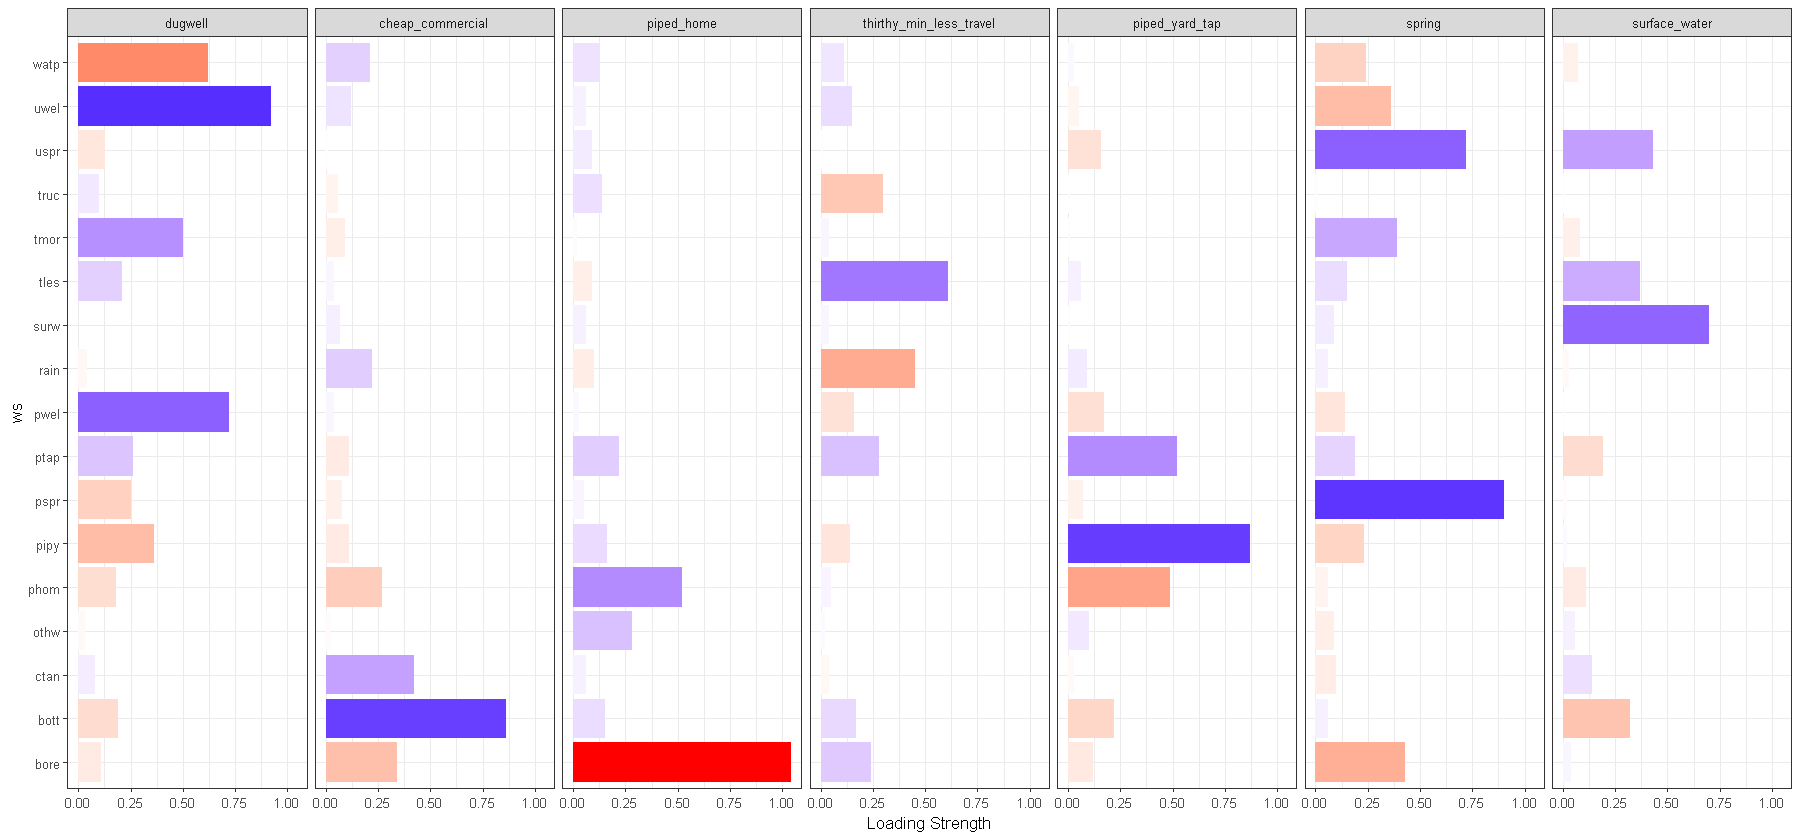

In [73]:
df.wa <- read_excel("../../results/factor-7-loadings.xlsx",sheet=1)
df.wa <- df.wa %>% 
  rename(
      dugwell = ML1,
      cheap_commercial = ML2,
      piped_home = ML3,
      thirthy_min_less_travel= ML4,
      piped_yard_tap = ML5,
      spring = ML6,
      surface_water = ML7
     )
df.wa <- as.data.frame(df.wa)
write_xlsx(df.wa , '../../results/factor-7-loadings.xlsx')

loadings.m <- melt(df.wa, id="ws", 
                   measure=c(    
        'dugwell',
   'cheap_commercial' ,
      'piped_home' ,
      'thirthy_min_less_travel',
      'piped_yard_tap' ,
      'spring',
      'surface_water' ), 
                   variable.name="Factor", value.name="Loading")

#size of the plot 
options(repr.plot.width=15, repr.plot.height=7)
par(mar = c(1,1,1,1))
par(cex=1)

#For each ws (water sources), plot the loading as length and fill color of a bar
# note that the length will be the absolute value of the loading but the 
# fill color will be the signed value, more on this below
ggplot(data = loadings.m, aes(x = ws, y = abs(Loading), fill=Loading)) + 
  facet_wrap(~ Factor, nrow=1) + #place the factors in separate facets
  geom_bar(stat="identity") + #make the bars
  coord_flip() + #flip the axes so the test names can be horizontal  
  #define the fill color gradient: blue=positive, red=negative
  scale_fill_gradient2(name = "Loading", 
                       high = "blue", mid = "white", low = "red", 
                       midpoint=0, guide=F) +
  ylab("Loading Strength") + #improve y-axis label
  theme_bw(base_size=10) #use a black-and0white theme with set font size

# For Loop for FA

In [ ]:
#For loop for factors of 3-5 fm = "minchi"
for (i in 4:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "minchi" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    #print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)
    print(iteration$BIC)
    print(iteration$TLI)
    print(iteration$rms)
    print(iteration$STATISTIC)
    print(iteration$PVAL)
    
    
    print(iteration$objective)
    print(iteration$EBIC )
    print(iteration$dof)
    print(iteration$chi)
    
    print(iteration$RMSEA)
} 


"none", "varimax", "quartimax", "bentlerT", "equamax", "varimin", "geominT" and "bifactor" are orthogonal rotations. "Promax", "promax", "oblimin", "simplimax", "bentlerQ, "geominQ" and "biquartimin" and "cluster" are possible oblique transformations of the solution. = rotation varimin = correction

Factoring method fm="minres" will do a minimum residual as will fm="uls".  fm="ols" differs very slightly from "minres". fm="wls" will do a weighted least squares (WLS) solution, fm="gls" does a generalized weighted least squares (GLS), fm="pa" will do the principal factor solution, fm="ml" will do a maximum likelihood factor analysis. fm="minchi" will minimize the sample size weighted chi square when treating pairwise correlations with different number of subjects per pair. fm ="minrank" will do a minimum rank factor analysis. "old.min" will do minimal residual the way it was done prior to April, 2017 (see discussion below). fm="alpha" will do alpha factor analysis as described in Kaiser and Coffey (1965)
Correction WLS and GLS, minrank, old.min
Correct for Oblimin works with minrank and old.min, ml, minchi,  = fm works with

In [ ]:
#For loop for factors of 2-6 fm = "minrank" 
for (i in 4:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "minrank" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$BIC)
    print(iteration$TLI)
    print(iteration$rms)
    print(iteration$STATISTIC)
    print(iteration$PVAL)
    
    
    print(iteration$objective)
    print(iteration$EBIC )
    print(iteration$dof)
    print(iteration$chi)
    
    print(iteration$RMSEA)
} 


In [ ]:
#For loop for factors of 2-6 fm = "minrank" 
for (i in 4:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "minrank" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}

In [ ]:
#For loop for factors of 2-10 fm = "ml"
for (i in 4:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$BIC) 
    print(iteration$TLI)
    print(iteration$rms)
    print(iteration$STATISTIC)
    print(iteration$PVAL)
    
    
    print(iteration$objective)
    print(iteration$EBIC )
    print(iteration$dof)
    print(iteration$chi)
    
     print(iteration$values)
    
    print(iteration$RMSEA)
} 

In [ ]:
# possible oblique transformations of the solution for better interpreation
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "oblimin", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "bentlerQ", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 2000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "promax", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
#  are orthogonal rotations for stronger interpreation
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "varimax", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "bentlerT", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}
for (i in 2:7) {
iteration <- fa(df.wa.nocountry, nfactors = i, rotate = "geominT", fm = "ml" , scores= "tenBerge", impute ="mean", max.iter = 1000)
    print(iteration$loadings, digits=2, cutoff=.2, sort=TRUE)}

# New FA 7 data frame

In [ ]:
df.wa.nocountry <- df.wa[,c(2:18)]
df.wa.nocountry <- as.matrix(df.wa.nocountry)
scores <- as.matrix(scores.seven.factors)
df.seven.scores <-  scores
df.seven.scores = as.data.frame(apply(as.matrix(df.seven.scores[,c(1:7)]), 2, rescale))
df.seven.scores <- cbind(df.wa,df.seven.scores)
df.seven.scores <- df.seven.scores[,c(1,19:25)]
head(df.seven.scores,7)
summary(df.seven.scores)
write_xlsx(df.seven.scores, '../../results/df-seven-scores.xlsx')

# Six factors - ml - promax

In [ ]:
solution.six <- fa(df.wa.nocountry, nfactors = 6, rotate = "promax", fm = "ml", scores="tenBerge", impute ="mean", max.iter = 1000 )
scores.six.factors = solution.six$scores
scores.six.factors = as.data.frame.matrix(scores.six.factors) #df.wa multiply by scores matrix
write_xlsx(scores.six.factors, '../../results/scores-6-factors.xlsx')
print(solution.six$loadings, digits=2, cutoff=.2, sort=TRUE) #sort out by the low numbers
df.wa.nocountry <- df.wa[,c(2:18)]
df.wa.nocountry <- as.matrix(df.wa.nocountry)
scores <- as.matrix(scores.six.factors)
df.six.scores <-  scores
df.six.scores = as.data.frame(apply(as.matrix(df.six.scores[,c(1:6)]), 2, rescale))
df.six.scores <- cbind(df.wa,df.six.scores)
df.six.scores <- df.six.scores[,c(1,19:24)]
head(df.six.scores,7)
summary(df.six.scores)
write_xlsx(df.six.scores, '../../results/df-six-scores.xlsx')

# Five factors - ml - promax

In [ ]:
solution.five <- fa(df.wa.nocountry, nfactors = 5, rotate = "promax", fm = "ml", scores="tenBerge", impute ="mean", max.iter = 1000 )
scores.five.factors = solution.five$scores
scores.five.factors = as.data.frame.matrix(scores.five.factors) #df.wa multiply by scores matrix
write_xlsx(scores.five.factors, '../../results/scores-5-factors.xlsx')
print(solution$loadings, digits=2, cutoff=.2, sort=TRUE) #sort out by the low numbers
df.wa.nocountry <- df.wa[,c(2:18)]
df.wa.nocountry <- as.matrix(df.wa.nocountry)
scores <- as.matrix(scores.five.factors)
df.five.scores <-  scores
df.five.scores = as.data.frame(apply(as.matrix(df.five.scores[,c(1:5)]), 2, rescale))
df.five.scores <- cbind(df.wa,df.five.scores)
df.five.scores <- df.five.scores[,c(1,19:23)]
head(df.five.scores,7)
summary(df.five.scores)
write_xlsx(df.five.scores, '../../results/df-five-scores.xlsx')

# Determining the Number of Factors to Extract

simple = five factors

In [ ]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)
df.wa.nocountry <- df.wa[,c(2:18)]

options(repr.plot.width=10, repr.plot.height=10)
ev <- eigen(cor(df.wa.nocountry)) # get eigenvalues
ap <- parallel(subject=nrow(df.wa.nocountry),var=ncol(df.wa.nocountry), rep=100, cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)
plotnScree(nS)

scree(df.wa.nocountry,factors=TRUE,pc=TRUE,main="Scree plot",hline=NULL,add=FALSE) 

In [ ]:
solution.mr <- fa(r = cor(df.wa.nocountry), nfactors = 5, rotate = "oblimin", fm = "minrank" , scores= "tenBerge" , impute ="mean", max.iter = 1000)

In [ ]:
fa.diagram(solution.mr)

# FA

The goal of this study is to analyze the characteristics of water accessibility

sources: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/115-famd-factor-analysis-of-mixed-data-in-r-essentials/

In [ ]:
df.wa <- read_excel("../../results/df-water-access.xlsx",sheet=1)



In [ ]:
res.famd <- FAMD(df.wa, graph = FALSE)
print(res.famd)

# Eigenvalues / Variances

In [ ]:
eig.val <- get_eigenvalue(res.famd)
head(eig.val)

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
fviz_screeplot(res.famd)

#  All variables

In [ ]:
var <- get_famd_var(res.famd)
var

In [ ]:
# Coordinates of variables
head(var$coord,7)
# Cos2: quality of representation on the factore map
head(var$cos2,7)
# Contributions to the  dimensions
head(var$contrib,7)

In [ ]:
# Plot of variables
fviz_famd_var(res.famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(res.famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(res.famd, "var", axes = 2)

The red dashed line on the graph above indicates the expected average value, If the contributions were uniform.

From the plots above, it can be seen that:

variables that contribute the most to the first dimension are: iwsp and watp.

variables that contribute the most to the second dimension are: basw and ptap.

# Quantitative variables

In [ ]:
quanti.var <- get_famd_var(res.famd, "quanti.var")
quanti.var 

In [ ]:
fviz_famd_var(res.famd, "quanti.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

In [ ]:
# Color by cos2 values: quality on the factor map
fviz_famd_var(res.famd, "quanti.var", col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE)

# Graph of qualitative variables

In [ ]:
fviz_famd_var(res.famd, "quali.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

# Graph of individuals

In [ ]:
ind <- get_famd_ind(res.famd)
ind

In [ ]:
fviz_famd_ind(res.famd, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

The factor analysis of mixed data (FAMD) makes it possible to analyze a data set, in which individuals are described by both qualitative and quantitative variables.

In [ ]:
result <- PCA(df.wa[,(2:18)])
result

# PCA

In [ ]:
head(df.wa.nocountry,7)

In [ ]:
# PCA Scree plot without standardizing data
hpca_dfsimple <- prcomp(df.wa.nocountry, scale=FALSE) # Scale to 0 to 1 # We can extract the information summarized above (and much more) # from the attributes of the object hpca_dfsimple

standard_deviation_of_each_component <- hpca_dfsimple$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_tot
var_per_dim/var_tot

var_prop <- var_per_dim / sum(var_per_dim)
var_prop

cum_var <- cumsum(var_prop)
cum_var
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')

apply(df.wa.nocountry, 2, mean)
apply(df.wa.nocountry, 2, var)



In [ ]:
hpca_cor <- prcomp(df.wa.nocountry, scale=TRUE) #Using the correlation matrix to obtain the eigenvalue #Single decomposition of the variance matrix.
standard_deviation_of_each_component <- hpca_cor$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_prop <- var_per_dim / sum(var_per_dim)
cum_var <- cumsum(var_prop)
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
eigenvectors <- hpca_cor$rotation
col.norm(eigenvectors)
eigenvectors

PC_contr <- eigenvectors[,c("PC1")] # Let us plot the contribution of the original dimension to the 1st PCA # PC_contr
ord <- order( -abs(PC_contr) )# We order by the magnitude of the contribution # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord] #PC_contr

In [ ]:
PC_contr1 <- PC_contr[1:7] # We just select the 7 highest contributing dimensions (highest loading)
PC_contr1
barplot(PC_contr1, main="Contribution to the 1st component", xlab="Original Dimensions") 

# Second principal component vector
PC_contr <- eigenvectors[,c("PC2")] # We order by the magnitude of the contribution
ord <- order( -abs(PC_contr) ) # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord]
PC_contr2 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=5)
barplot(PC_contr2, main="Contribution to the 2nd component",xlab="Original Dimensions") 
# Third principal component vector
PC_contr <- eigenvectors[,c("PC3")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr3 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr3, main="Contribution to the 3rd component",xlab="Original Dimensions") 
# 4 principal component vector
PC_contr <- eigenvectors[,c("PC4")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr4 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr4, main="Contribution to the 4th component",xlab="Original Dimensions") 
# 5 principal component vector
PC_contr <- eigenvectors[,c("PC5")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr5 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr5, main="Contribution to the 5th component",xlab="Original Dimensions") 
# 6 principal component vector
PC_contr <- eigenvectors[,c("PC6")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr6 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr6, main="Contribution to the 6th component",xlab="Original Dimensions") 
# 7 principal component vector
PC_contr <- eigenvectors[,c("PC7")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr7 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr7, main="Contribution to the 7th component",xlab="Original Dimensions")

In [ ]:
res.pca <- PCA(df.wa.nocountry, graph = FALSE)
print(res.pca)
eig.val <- get_eigenvalue(res.pca) #The object that is created using the function PCA() contains many information found in many different lists and matrices. These values are described in the next section.
head(eig.val,7)
#An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in
#standardized data. This is commonly used as a cutoff point for which PCs are retained. This holds true only when
#the data are standardized.
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 76))
var <- get_pca_var(res.pca)
var
# Coordinates
head(var$coord, 17)
# Cos2: quality on the factor map
head(var$cos2,17)
# Contributions to the principal components
head(var$contrib, 17)
#For all the 17 variables.
fviz_pca_var(res.pca, col.var = "black")
#The plot above is also known as variable correlation plots. It shows the relationships between all variables. It can be interpreted as follow:
#Positively correlated variables are grouped together.
#Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
#The distance between variables and the origin measures the quality of the variables on the factor map. Variables that
#are away from the origin are well represented on the factor map.
corrplot(var$cos2, is.corr=FALSE, tl.cex = 1 )
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2, tl.cex = 1)
#A high cos2 indicates a good representation of the variable on the principal component. In this case the variable is
#positioned close to the circumference of the correlation circle.
#A low cos2 indicates that the variable is not perfectly represented by the PCs.
#In this case the variable is close to the center of the circle.
#The cos2 values are used to estimate the quality of the representation
#The closer a variable is to the circle of correlations,
#the better its representation on the factor map (and the more important it is to interpret these components)
#Variables that are closed to the center of the plot are less important for the first components.
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping, 
    )
#variables with low cos2 values will be colored in "white"
#variables with mid cos2 values will be colored in "blue"
#variables with high cos2 values will be colored in red
corrplot(var$contrib, is.corr=FALSE,tl.cex = 1) 
#The larger the value of the contribution, the more the variable contributes to the component.
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
# Contributions of variables to PC3
fviz_contrib(res.pca, choice = "var", axes = 3, top = 10)
# Contributions of variables to PC4
fviz_contrib(res.pca, choice = "var", axes = 4, top = 10)
# Contributions of variables to PC5
fviz_contrib(res.pca, choice = "var", axes = 5, top = 10)
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)
#It can be seen that the variables H IWS P and H W - contribute the most to the dimensions 1 and 2.
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
)
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1
res.desc$Dim.2
ind <- get_pca_ind(res.pca)
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
)
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2, tl.cex = .5)